In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train=train.drop(['ID'],axis=1)

In [11]:
train.isnull().sum()
train.Username=train.Username.astype(float)

In [35]:
train2=train


Tag              0
Reputation       0
Answers          0
Username         0
Views            0
Upvotes          0
views_per_ans    0
dtype: int64

In [16]:
train['views_per_ans']=train.Views/train.Answers


In [17]:
train.head()

,Tag,Reputation,Answers,Username,Views,Upvotes,views_per_ans
0,a,3942.0,2.0,155623.0,7855.0,42.0,3927.500000
1,a,26046.0,12.0,21781.0,55801.0,1175.0,4650.083333
2,c,1358.0,4.0,56177.0,8067.0,60.0,2016.750000
3,a,264.0,3.0,168793.0,27064.0,9.0,9021.333333
4,c,4271.0,4.0,112223.0,13986.0,83.0,3496.500000


In [19]:
train1=pd.get_dummies(train)
train1.head()

,Reputation,Answers,Username,Views,Upvotes,views_per_ans,Tag_a,Tag_c,Tag_h,Tag_i,Tag_j,Tag_o,Tag_p,Tag_r,Tag_s,Tag_x
0,3942.0,2.0,155623.0,7855.0,42.0,3927.500000,1,0,0,0,0,0,0,0,0,0
1,26046.0,12.0,21781.0,55801.0,1175.0,4650.083333,1,0,0,0,0,0,0,0,0,0
2,1358.0,4.0,56177.0,8067.0,60.0,2016.750000,0,1,0,0,0,0,0,0,0,0
3,264.0,3.0,168793.0,27064.0,9.0,9021.333333,1,0,0,0,0,0,0,0,0,0
4,4271.0,4.0,112223.0,13986.0,83.0,3496.500000,0,1,0,0,0,0,0,0,0,0


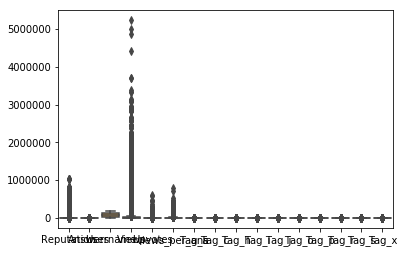

In [22]:
sns.boxplot(data=train1)

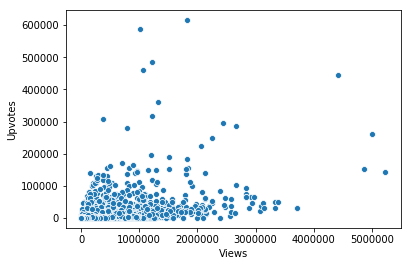

In [24]:
sns.scatterplot(x='Views',y='Upvotes',data=train1)

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
ss=Normalizer()
train1.Username=train1.Username.astype(int)

In [32]:
train1.columns

Index(['Reputation', 'Answers', 'Username', 'Views', 'Upvotes',
       'views_per_ans', 'Tag_a', 'Tag_c', 'Tag_h', 'Tag_i', 'Tag_j', 'Tag_o',
       'Tag_p', 'Tag_r', 'Tag_s', 'Tag_x'],
      dtype='object')

In [33]:
x=train1[['Reputation', 'Answers', 'Username', 'Views', 
       'views_per_ans', 'Tag_a', 'Tag_c', 'Tag_h', 'Tag_i', 'Tag_j', 'Tag_o',
       'Tag_p', 'Tag_r', 'Tag_s', 'Tag_x']]
y=train1.Upvotes
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.4,random_state=78)

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rf_model=RandomForestRegressor()
rf_model.fit(xtrain,ytrain)
ypred=rf_model.predict(xtest)
a=mean_squared_error(ytest,ypred)
print('rmse:',np.sqrt(a))

E:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [55]:
train1[train1.values==np.inf]=0.0
x=train1[['Reputation', 'Answers', 'Username', 'Views', 
       'views_per_ans', 'Tag_a', 'Tag_c', 'Tag_h', 'Tag_i', 'Tag_j', 'Tag_o',
       'Tag_p', 'Tag_r', 'Tag_s', 'Tag_x']]
y=train1.Upvotes
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.4,random_state=9019)


In [56]:
rf_model=RandomForestRegressor()
rf_model.fit(xtrain,ytrain)
ypred=rf_model.predict(xtest)
a=mean_squared_error(ytest,ypred)
print('rmse:',np.sqrt(a))

E:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


rmse: 1213.1291584842688


In [41]:
ids=test.ID

In [50]:
test=test.drop(['ID'],axis=1)
test['views_per_ans']=test.Views/test.Answers

In [59]:

test1=pd.get_dummies(test)

In [60]:
test1[test1.values==np.inf]=0.0

In [61]:
ypred_1=rf_model.predict(test1)

In [62]:
sub=pd.DataFrame({'ID':ids,'Upvotes':ypred_1})
sub.to_csv('submit.csv')

In [73]:
train2=train1
test2=test1
train6=train1

In [65]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
b=train2[['Reputation', 'Answers', 'Username', 'Views', 
       'views_per_ans', 'Tag_a', 'Tag_c', 'Tag_h', 'Tag_i', 'Tag_j', 'Tag_o',
       'Tag_p', 'Tag_r', 'Tag_s', 'Tag_x']]
#y=train2.Upvotes
#xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.4,random_state=9019)

In [66]:
c=ss.fit_transform(b)

E:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
E:\Anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [68]:
train3=pd.DataFrame(c,columns=['Reputation', 'Answers', 'Username', 'Views', 
       'views_per_ans', 'Tag_a', 'Tag_c', 'Tag_h', 'Tag_i', 'Tag_j', 'Tag_o',
       'Tag_p', 'Tag_r', 'Tag_s', 'Tag_x'])

In [70]:
q=ss.fit_transform(test2)

E:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
E:\Anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [71]:
test3=pd.DataFrame(q,columns=['Reputation', 'Answers', 'Username', 'Views', 
       'views_per_ans', 'Tag_a', 'Tag_c', 'Tag_h', 'Tag_i', 'Tag_j', 'Tag_o',
       'Tag_p', 'Tag_r', 'Tag_s', 'Tag_x'])

In [74]:
train6.columns

Index(['Reputation', 'Answers', 'Username', 'Views', 'Upvotes',
       'views_per_ans', 'Tag_a', 'Tag_c', 'Tag_h', 'Tag_i', 'Tag_j', 'Tag_o',
       'Tag_p', 'Tag_r', 'Tag_s', 'Tag_x'],
      dtype='object')

In [75]:
X=train6[['Reputation', 'Answers', 'Username', 'Views', 
       'views_per_ans', 'Tag_a', 'Tag_c', 'Tag_h', 'Tag_i', 'Tag_j', 'Tag_o',
       'Tag_p', 'Tag_r', 'Tag_s', 'Tag_x']]
X=ss.fit_transform(X)
Y=train6.Upvotes

E:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
E:\Anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [93]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.4,random_state=9019)

In [94]:
rf_model=RandomForestRegressor()
rf_model.fit(xtrain,ytrain)
ypred=rf_model.predict(xtest)
a=mean_squared_error(ytest,ypred)
print('rmse:',np.sqrt(a))

E:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


rmse: 1043.8045017411016


In [95]:
ypred_2=rf_model.predict(test3)
sub=pd.DataFrame({'ID':ids,'Upvotes':ypred_2})
sub.to_csv('submit1.csv')